In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import animation, rc
from IPython.display import HTML

# Stationary States
When the potential energy function depends only on position, $V(x)$, we can use separation of variables to simplify the Schrödinger Equation. We suppose a solution,
$$ \Psi(x,t)=\psi(x)\varphi(t), $$
and reduce the time-dependent Schrödinger Equation into a time-independent Schrödinger equation (TISE),
$$ -\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V\psi  = E\psi,$$
and a relatively simple first-order differential equation for the time dependence,
$$\frac{d\varphi}{dt}=-\frac{iE}{\hbar}\varphi.$$
Separable solutions are called *stationary states*, and this notebook we will look at the some of their unique and useful properties.

## 1. Stationary?
Does that mean the particle isn't moving and the momentum is zero? Does it mean the wave function does not depend on time?

No. Stationary states can have momentum, and they certainly **do** depend on time. "Stationary" here means that the probability density of the particle does not change. This is pretty easy to see for yourself by calculating $|\Psi|^2$.

## 2. Definite Energy
If a particle is in a stationary state, it will always have the same energy, $E$. This is because the left hand side of the TISE as written above is the Hamiltonian operator acting on $\psi$, and we get out nothing but $E\psi$ (I'm skimming over the $varpsi$ part which you can easily show won't factor in). From this simple fact you can easily see that
$$\langle\hat{H}\rangle=E\,\,\,\mathrm{and}\,\,\,\sigma_H^2=0.$$

In linear algebra language, these states are *eigenfunctions* of the Hamiltonian. The fact that their energy is definite and constant is deeply tied to Noether's theorem.

*But wait!* What happened to the uncertaintly principle?? How can we know the exact energy if there's always uncertainty? Well, so far we've talked about the uncertainty relationship between position and momentum. There is a similar (but not completely analogous) relationship between energy and time. But we're saved by the fact that the definite energy is time independent - i.e. the spread in time is infinite.

## 3. Linear Combinations
Here's the really fun part. We can take solutions of the TISE, add their corresponding time-dependence, $\Psi_n(x,t)=\psi_n(x)e^{-iE_nt/\hbar}$, and now combine these solutions together to get general solutions to the time **dependent** Schrödinger equation.
$$\Psi(x,t)=\sum_nc_n\psi_n(x)e^{-iE_nt/\hbar}$$

So what does this new $\Psi(x,t)$ represent? Is it a legitimate, physical solution to the Schrödinger equation? Yes! Well, assuming it's normalized, but that's easy enough. 

But what energy does this new state have? If you measure the energy, you will find any $E_n$ with appropriate probability determined by the wavefunction (we'll determine what that is later). This is a case of *superposition* - the particle is in multiple stationary states at the same time.

## Example: Infinite Square Well
I'm going to jump ahead to the infinite square well (and its solutions) to demonstrate stationary states and their combinations. The energies are
$$ E_n = \frac{n^2\pi^2\hbar^2}{2ma^2},$$
and the spatial wavefunctions are
$$ \psi_n(x) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a}x\right).$$
Let's code that up into a couple of functions.

In [2]:
def psi(x, a=1, n=1):
    return np.sqrt(2 / a) * np.sin(n * np.pi * x / a)

def En(a=1, n=1, m=const.m_e):
    return (n * np.pi * const.hbar)**2 / (2 * m * a**2)

def Psi(x, t, a=1, n=1, m=const.m_e):
    energy = En(a=a, n=n, m=m)
    if isinstance(t, (list, np.ndarray)):
        return psi(x[:, np.newaxis], a=a, n=n) * np.exp(-1j * energy * t[np.newaxis, :] / const.hbar)
    else:
        return psi(x, a=a, n=n) * np.exp(-1j * energy * t / const.hbar)

First, let's look at a single stationary state. You can change `n` to look at other states, or change `a` to change the width of the potential well.

<IPython.core.display.Javascript object>


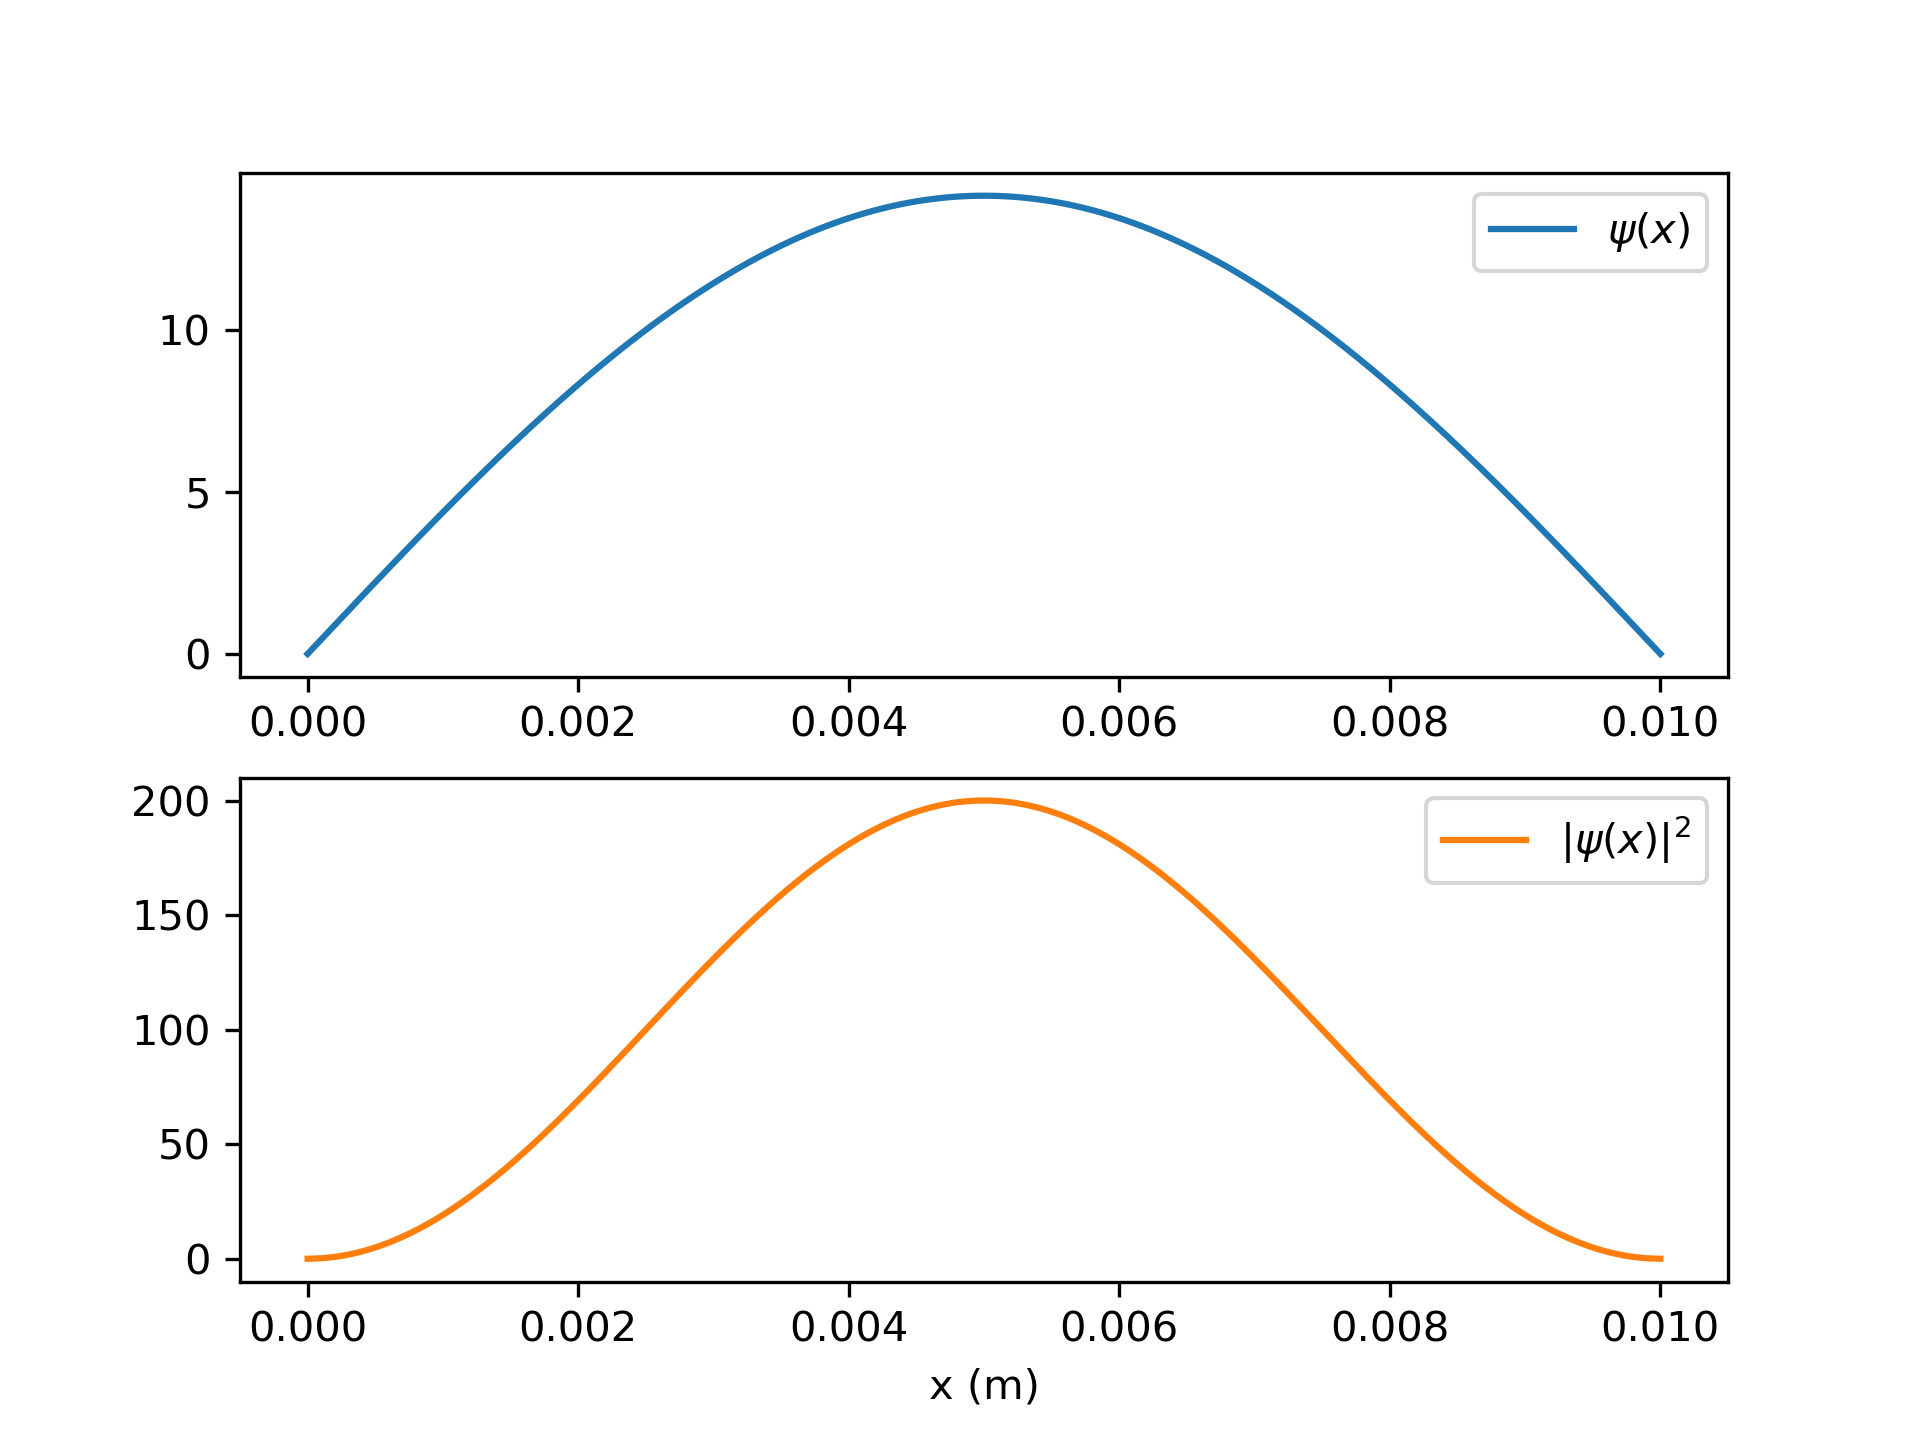

Energy = 6.02466740223757e-34 J.


In [5]:
a = 0.01  # 1 cm
n = 1  # Choose an energy state
xarr = np.linspace(0, a, 10000)  # Creates an array from 0 to a with 10000 points

fig = plt.figure()
ax1 = plt.subplot(211)
plt.plot(xarr, psi(xarr, a=a, n=n), label='$\psi(x)$')
plt.legend()
plt.subplot(212, sharex=ax1)
plt.plot(xarr, np.abs(psi(xarr, a=a, n=n))**2, 'C1', label='$|\psi(x)|^2$')
plt.xlabel('x (m)')
plt.legend()

print(f'Energy = {En(a=a, n=n)} J.')

Now what happens as time progresses? Let's take a look.

Period = 1.0998233939916862s


<IPython.core.display.Javascript object>


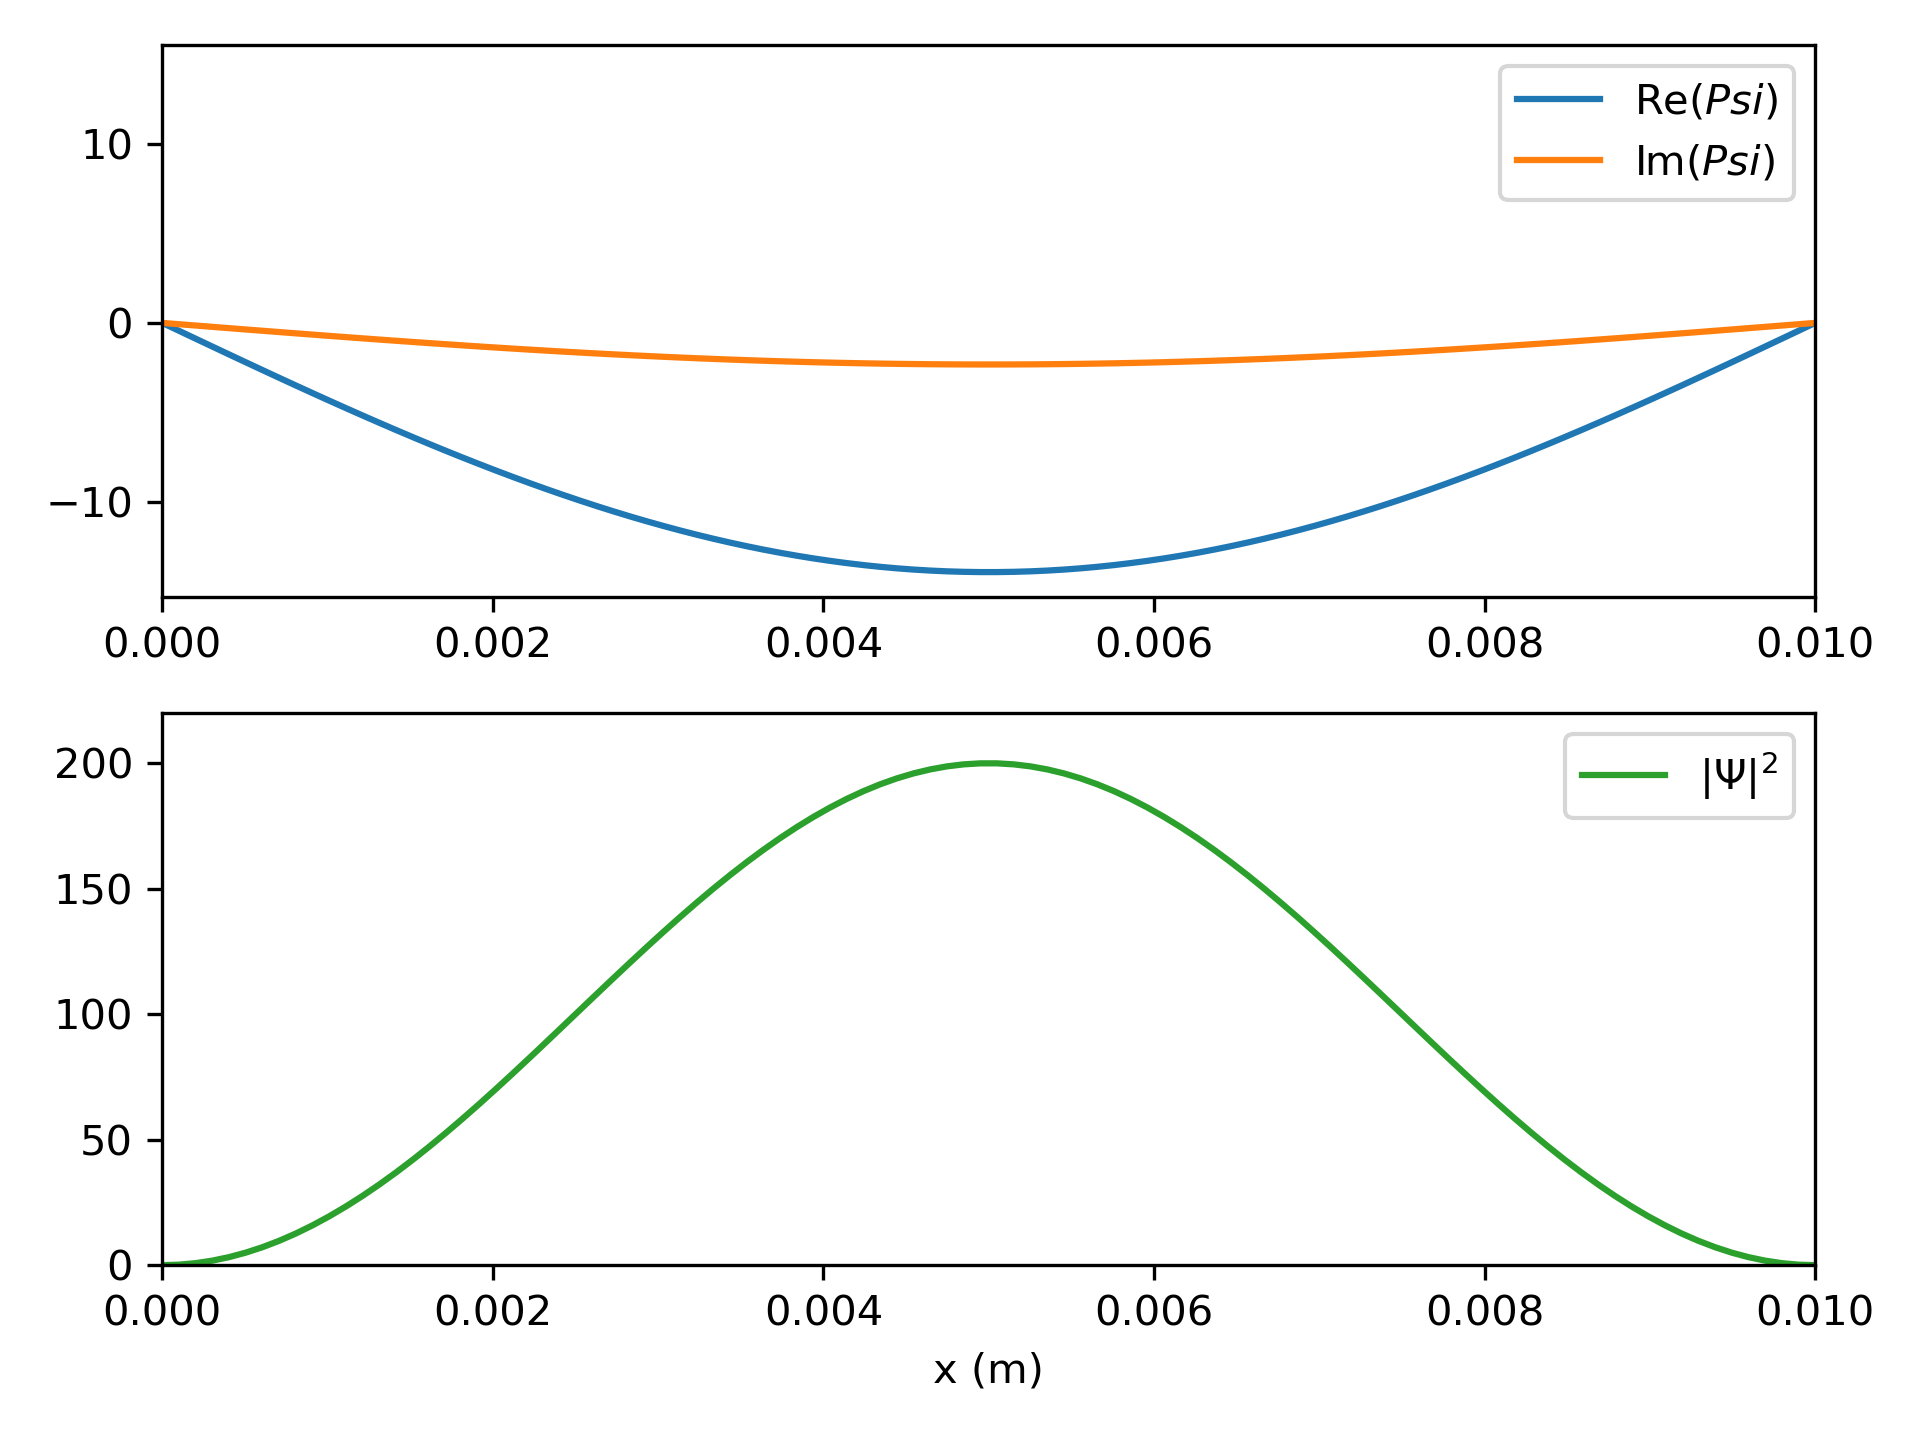

In [7]:
# Some of this is repeated, but here for convenience.
a = 0.01  # 1 cm
n = 1  # Choose an energy state
mass = const.m_e
xarr = np.linspace(0, a, 100)  # Creates an array from 0 to L with 100 points
period = 2 * np.pi * const.hbar / En(a=a, n=n, m=mass)
print(f'Period = {period}s')
tarr = np.linspace(0, period, 20)

wavefcn = Psi(xarr, tarr, a=a, n=n, m=mass)

fig, ax = plt.subplots(nrows=2, ncols=1);
lines = []

ax[0].set_xlim([0, a])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], label='Re($Psi$)')[0]);
lines.append(ax[0].plot([], [], label='Im($Psi$)')[0]);
ax[0].legend(loc='upper right')
ax[1].set_xlim([0, a])
ax[1].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[1].plot([], [], 'C2', label='$|\Psi|^2$')[0]);
plt.legend()
ax[1].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn[:, i]))
    lines[1].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[2].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
# HTML(anim.to_html5_video())

Let's go a little further and see what happens to an electron if its wavefunction is a combination of two energy states.

period1 = 1.0998233939916862, period2 = 0.27495584849792154, period = 1.0998233939916862


<IPython.core.display.Javascript object>


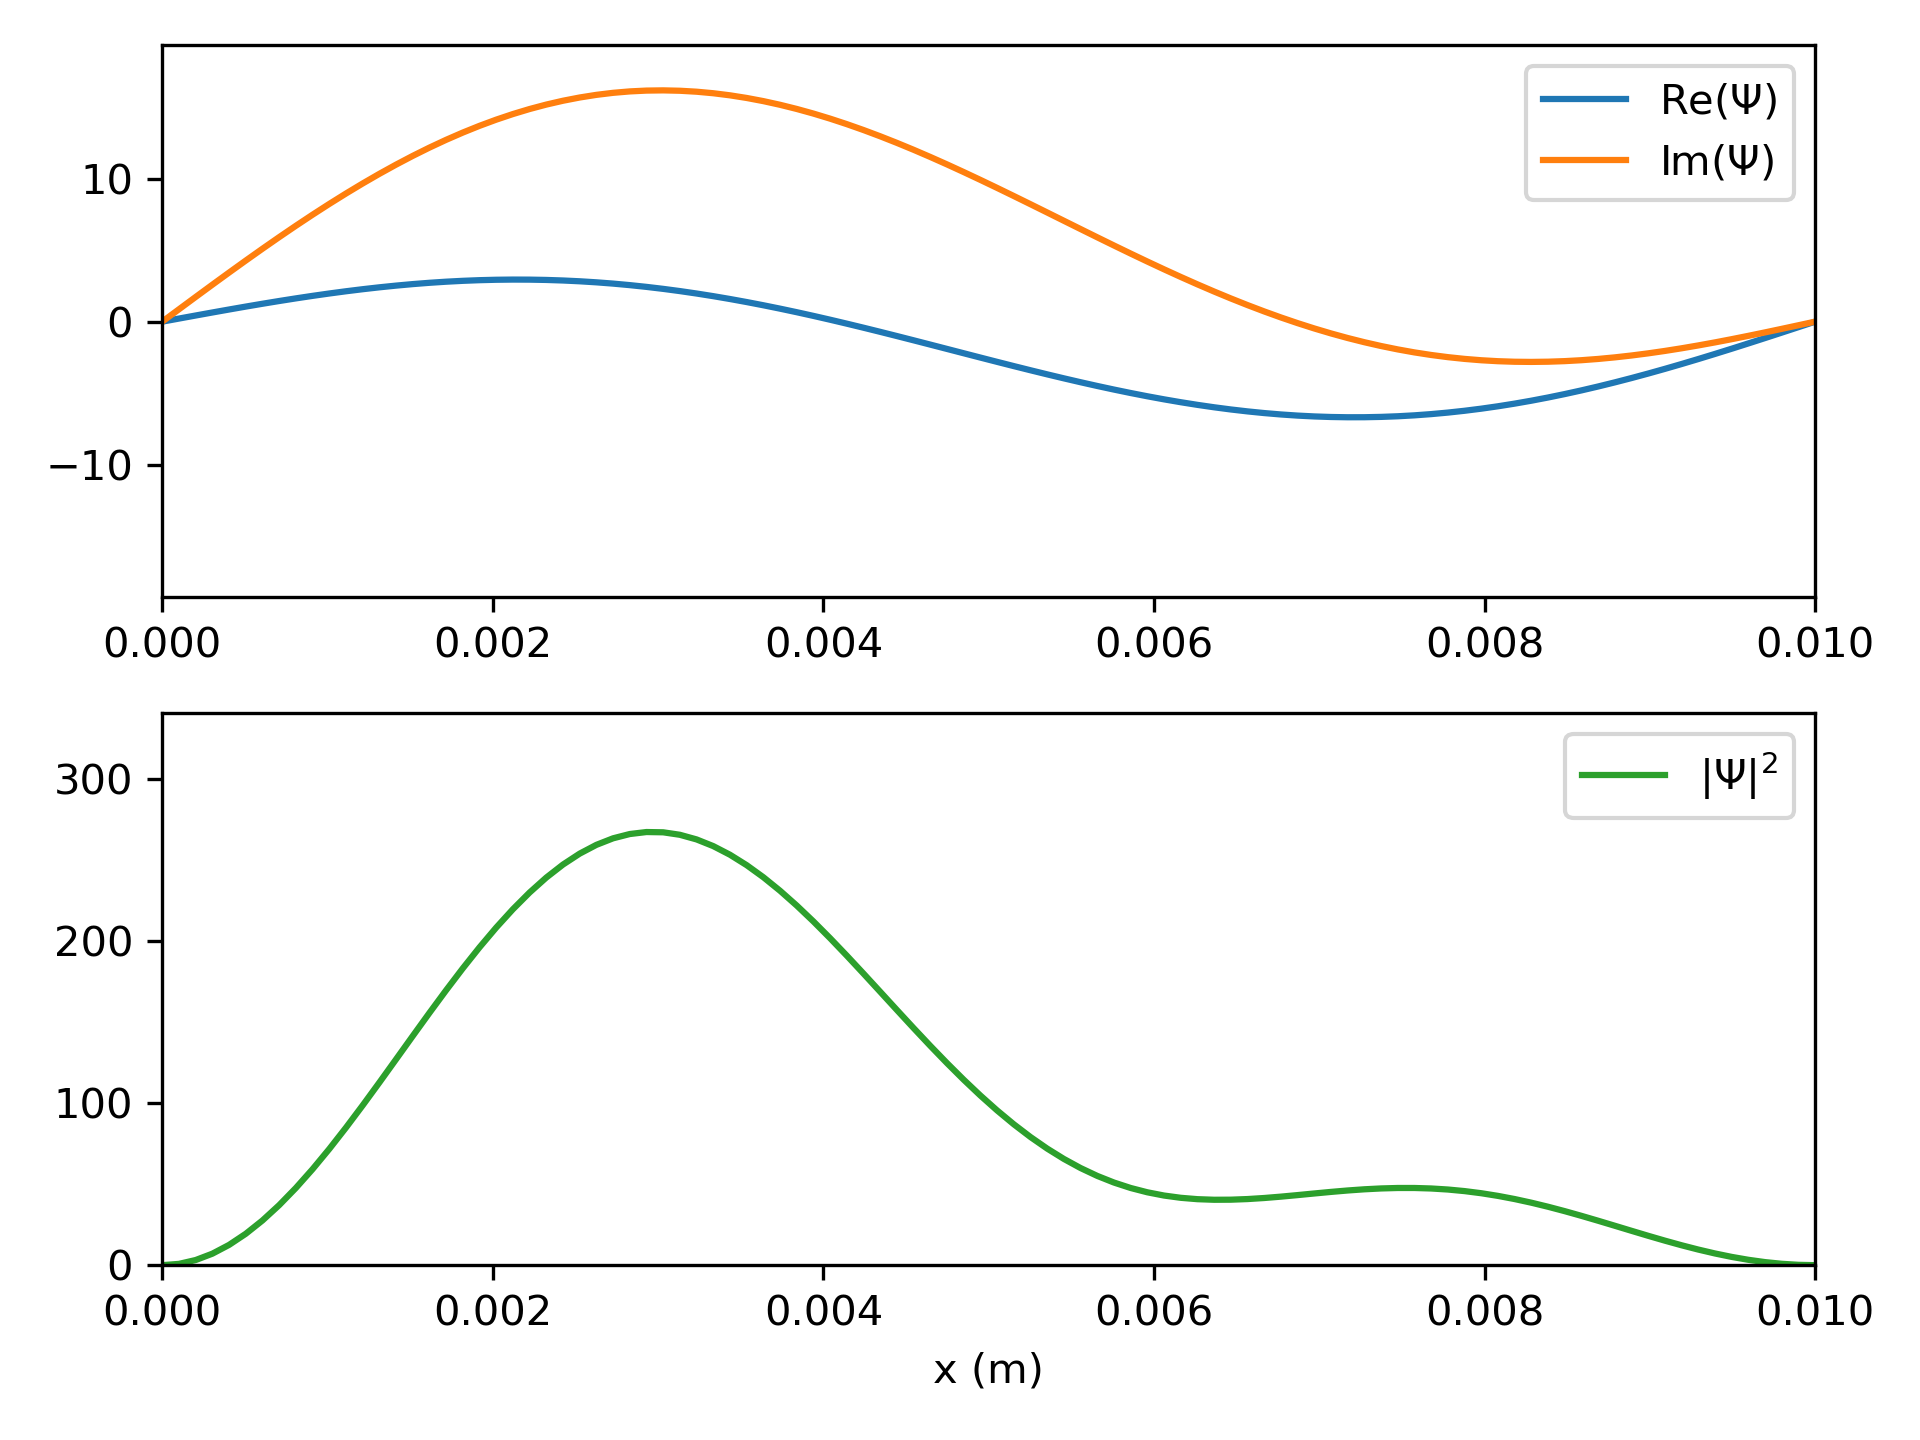

In [8]:
# Some of this is repeated, but here for convenience.
a = 0.01  # 1 cm
n1 = 1  # Choose an energy state
n2 = 2
mass = const.m_e
xarr = np.linspace(0, a, 100)  # Creates an array from 0 to L with 100 points
period1 = 2 * np.pi * const.hbar / En(a=a, n=n1, m=mass)
period2 = 2 * np.pi * const.hbar / En(a=a, n=n2, m=mass)
period = 2 * np.pi * const.hbar / En(a=a, n=1, m=mass)

print(f'period1 = {period1}, period2 = {period2}, period = {period}')

tarr = np.linspace(0, period, 100)

wavefcn1 = Psi(xarr, tarr, a=a, n=n1, m=mass)
wavefcn2 = Psi(xarr, tarr, a=a, n=n2, m=mass)
wavefcn = 1 / np.sqrt(2) * (wavefcn1 + wavefcn2)

fig, ax = plt.subplots(nrows=2, ncols=1);
lines = []

ax[0].set_xlim([0, a])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], label='Re($\Psi$)')[0]);
lines.append(ax[0].plot([], [], label='Im($\Psi$)')[0]);
ax[0].legend(loc='upper right')
ax[1].set_xlim([0, a])
ax[1].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[1].plot([], [], 'C2', label='$|\Psi|^2$')[0]);
plt.legend()
ax[1].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn[:, i]))
    lines[1].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[2].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
# HTML(anim.to_html5_video())

This next version is a different view to try to visualize the *interference* between the two energy states.

period1 = 1.0998233939916862, period2 = 0.27495584849792154, period = 1.0998233939916862


<IPython.core.display.Javascript object>


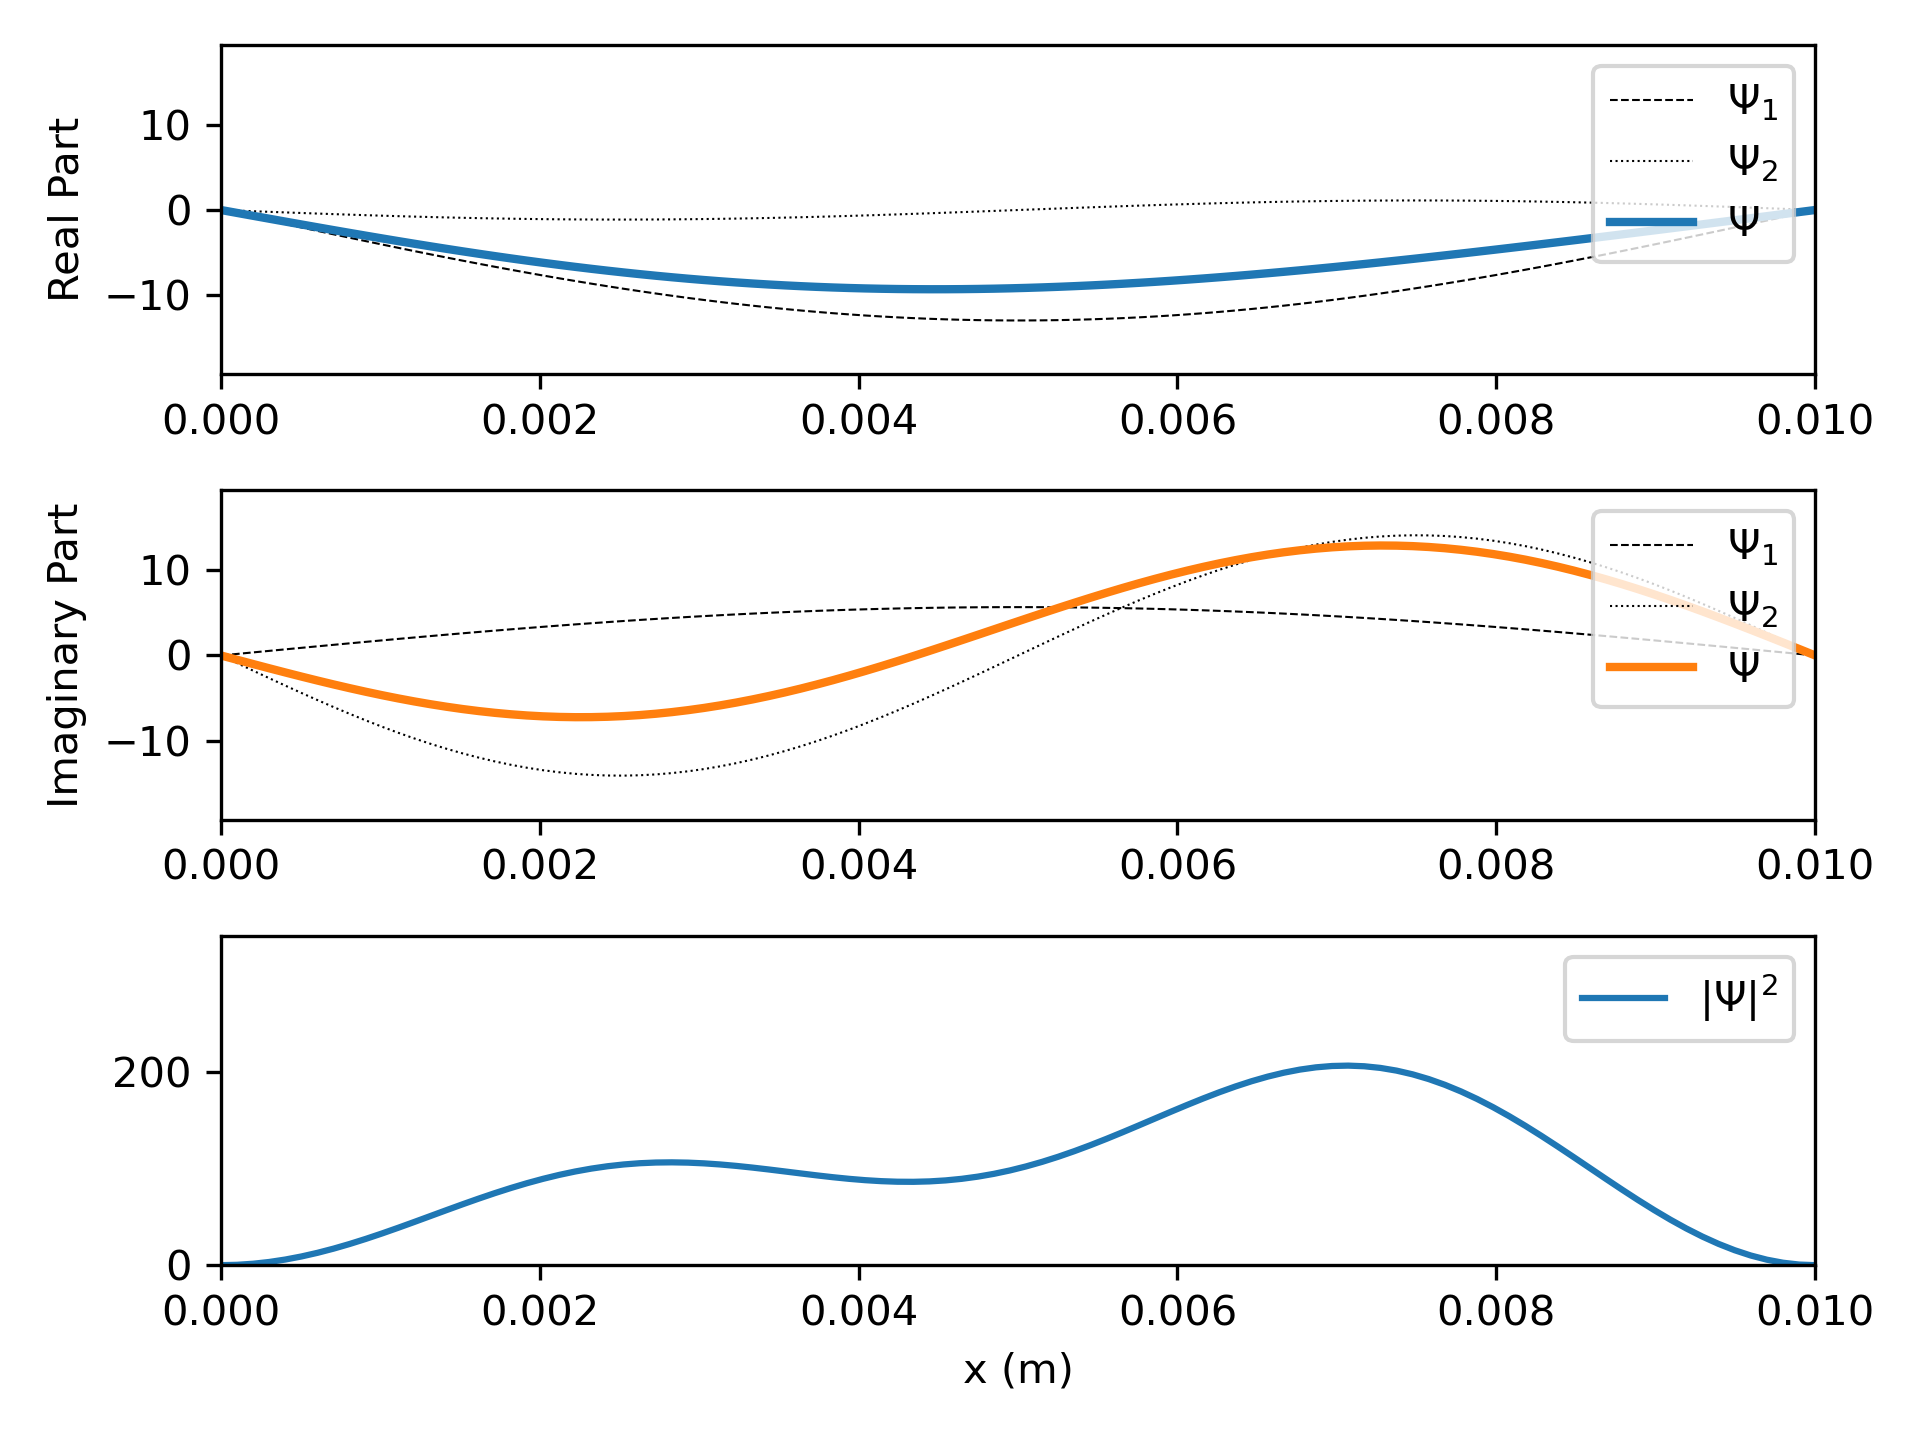

In [10]:
# Some of this is repeated, but here for convenience.
a = 0.01  # 1 cm
n1 = 1  # Choose an energy state
n2 = 2
mass = const.m_e
xarr = np.linspace(0, a, 100)  # Creates an array from 0 to L with 100 points
period1 = 2 * np.pi * const.hbar / En(a=a, n=n1, m=mass)
period2 = 2 * np.pi * const.hbar / En(a=a, n=n2, m=mass)
period = 2 * np.pi * const.hbar / En(a=a, n=1, m=mass)

print(f'period1 = {period1}, period2 = {period2}, period = {period}')

tarr = np.linspace(0, period, 100)

wavefcn1 = Psi(xarr, tarr, a=a, n=n1, m=mass)
wavefcn2 = Psi(xarr, tarr, a=a, n=n2, m=mass)
wavefcn = 1 / np.sqrt(2) * (wavefcn1 + wavefcn2)

fig, ax = plt.subplots(nrows=3, ncols=1);
lines = []

ax[0].set_xlim([0, a])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], '--k', label='$\Psi_1$', lw=0.5)[0]);
lines.append(ax[0].plot([], [], ':k', label='$\Psi_2$', lw=0.5)[0]);
lines.append(ax[0].plot([], [], label='$\Psi$', lw=2)[0]);
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Real Part')
ax[1].set_xlim([0, a])
ax[1].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[1].plot([], [], '--k', label='$\Psi_1$', lw=0.5)[0]);
lines.append(ax[1].plot([], [], ':k', label='$\Psi_2$', lw=0.5)[0]);
lines.append(ax[1].plot([], [], 'C1', label='$\Psi$', lw=2)[0]);
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Imaginary Part')
ax[2].set_xlim([0, a])
ax[2].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[2].plot([], [], label='$|\Psi|^2$')[0]);
plt.legend()
ax[2].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn1[:, i]))
    lines[1].set_data(xarr, np.real(wavefcn2[:, i]))
    lines[2].set_data(xarr, np.real(wavefcn[:, i]))
    lines[3].set_data(xarr, np.imag(wavefcn1[:, i]))
    lines[4].set_data(xarr, np.imag(wavefcn2[:, i]))
    lines[5].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[6].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
HTML(anim.to_html5_video())